### 載入圖片

In [11]:
import os, shutil

# 解壓縮資料夾所在的目錄路徑
original_dataset_dir_NG = r'./DATA/NG'
original_dataset_dir_PASS = r'./DATA/PASS'
# 用來儲存少量資料集的目錄位置
base_dir = r'./DATA'
if not os.path.isdir(base_dir): os.mkdir(base_dir)  # 如果目錄不存在, 才建立目錄

# 分拆成訓練、驗證與測試目錄位置
train_dir = os.path.join(base_dir, 'train')
if not os.path.isdir(train_dir): os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
if not os.path.isdir(validation_dir): os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
if not os.path.isdir(test_dir): os.mkdir(test_dir)


train_cats_dir = os.path.join(train_dir, 'PASS')
if not os.path.isdir(train_cats_dir):
    os.mkdir(train_cats_dir) # 用來訓練PASS圖片的目錄位置

train_dogs_dir = os.path.join(train_dir, 'NG')
if not os.path.isdir(train_dogs_dir):
    os.mkdir(train_dogs_dir) # 用來訓練NG圖片的目錄位置

validation_cats_dir = os.path.join(validation_dir, 'PASS')
if not os.path.isdir(validation_cats_dir):
    os.mkdir(validation_cats_dir) # 用來驗證PASS圖片的目錄位置

validation_dogs_dir = os.path.join(validation_dir, 'NG')
if not os.path.isdir(validation_dogs_dir):
    os.mkdir(validation_dogs_dir) # 用來驗證NG圖片的目錄位置

test_cats_dir = os.path.join(test_dir, 'PASS')
if not os.path.isdir(test_cats_dir):
    os.mkdir(test_cats_dir) # 用來測試PASS圖片的目錄位置

test_dogs_dir = os.path.join(test_dir, 'NG')
if not os.path.isdir(test_dogs_dir):
    os.mkdir(test_dogs_dir) # 用來測試NG圖片的目錄位置


# 複製前面PASS圖片到 train_cats_dir 訓練目錄
fnames = ['PASS_{}.jpg'.format(i) for i in range(1,61)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_PASS, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 複製下 張PASS圖片到 validation_cats_dir 驗證目錄
fnames = ['PASS_{}.jpg'.format(i) for i in range(60, 90)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_PASS, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# 複製下 幾張PASS圖片到 test_cats_dir 測試目錄
fnames = ['PASS_{}.jpg'.format(i) for i in range(90, 100)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_PASS, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# 複製前面 幾張NG圖片到 train_dogs_dir 訓練目錄
fnames = ['NG_{}.jpg'.format(i) for i in range(1, 61)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_NG, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 複製下 幾張NG圖片到 validation_dogs_dir 驗證目錄
fnames = ['NG_{}.jpg'.format(i) for i in range(60, 90)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_NG, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 複製下 幾張NG圖片到 test_dogs_dir 測試目錄
fnames = ['NG_{}.jpg'.format(i) for i in range(90, 100)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_NG, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

print('複製完成')

複製完成


In [ ]:
os.getcwd()

'/content'

In [ ]:
! nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


### 我們計算每個訓練/驗證/測試分組中的圖片數量，做為資料完整性的檢查：

In [12]:
print('訓練用的PASS照片張數:', len(os.listdir(train_cats_dir)))
print('訓練用的NG照片張數:', len(os.listdir(train_dogs_dir)))
print('驗證用的PASS照片張數:', len(os.listdir(validation_cats_dir)))
print('驗證用的NG照片張數:', len(os.listdir(validation_dogs_dir)))
print('測試用的PASS照片張數:', len(os.listdir(test_cats_dir)))
print('測試用的NG照片張數:', len(os.listdir(test_dogs_dir)))

訓練用的貓照片張數: 60
訓練用的狗照片張數: 60
驗證用的貓照片張數: 30
驗證用的狗照片張數: 30
測試用的貓照片張數: 10
測試用的狗照片張數: 10


### 程式 5.11 透過 ImageDataGenerator 設定資料擴增

In [13]:
from keras import layers  # 從 keras 套件匯入 layers, models 套件
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
datagen = ImageDataGenerator(
    rotation_range=0.1,
    width_shift_range=0.001,
    height_shift_range=0.001,
    shear_range=0.001,
    zoom_range=0.001,
    horizontal_flip=True,
    fill_mode='nearest')

In [14]:
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

# 使用ResNet50的權重，不包含頂層（Top Layer）
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(500, 500, 3))

# 在ResNet50的基礎上增加自己的分類層
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# 凍結ResNet的權重，只訓練自己添加的分類層
for layer in base_model.layers:
    layer.trainable = False

# 編譯模型
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 查看模型結構
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 16, 16, 2048)      23587712  
                                                                 
 flatten_2 (Flatten)         (None, 524288)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               67108992  
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 90696833 (345.98 MB)
Trainable params: 67109121 (256.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


### 程式 5.14 使用資料擴增產生器來訓練卷積神經網路

In [15]:
train_datagen = ImageDataGenerator(
    rotation_range=0.01,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True, )

test_datagen = ImageDataGenerator(rescale=1./255) # 請注意！驗證資料不應該擴充!!!

train_generator = train_datagen.flow_from_directory(
    train_dir,    # 目標目錄
    target_size=(500, 500), # 所有圖像大小調整成 150×150
    batch_size=32,
    class_mode='binary',
    shuffle=True) # 因為使用二元交叉熵 binary_crossentropy 作為損失，所以需要二元標籤


validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(500, 500),
    batch_size=32,
    class_mode='binary',
    shuffle=True)

# 訓練
# history = model.fit(
#     train_generator,
#     steps_per_epoch=4,
#     epochs=100,
#     validation_data=validation_generator,
#     validation_steps=10)

history = model.fit(
    train_generator,
    steps_per_epoch=4,
    epochs=40,
    validation_data=validation_generator,
    validation_steps=8
)

Found 120 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Epoch 1/40
4/4 [==============================] - ETA: 0s - loss: 44.2121 - accuracy: 0.6333

4/4 [==============================] - 14s 3s/step - loss: 44.2121 - accuracy: 0.6333 - val_loss: 2.6703 - val_accuracy: 0.5000
Epoch 2/40
4/4 [==============================] - 7s 2s/step - loss: 22.3201 - accuracy: 0.6750
Epoch 3/40
4/4 [==============================] - 8s 2s/step - loss: 28.7497 - accuracy: 0.7417
Epoch 4/40
4/4 [==============================] - 8s 2s/step - loss: 7.2036 - accuracy: 0.8167
Epoch 5/40
4/4 [==============================] - 7s 2s/step - loss: 7.0427 - accuracy: 0.7667
Epoch 6/40
4/4 [==============================] - 8s 2s/step - loss: 3.7796 - accuracy: 0.8833
Epoch 7/40
4/4 [==============================] - 8s 2s/step - loss: 2.3788 - accuracy: 0.8833
Epoch 8/40
4/4 [==============================] - 8s 2s/step - loss: 1.6059 - accuracy: 0.8833
Epoch 9/40
4/4 [==============================] - 8s 2s/step - loss: 0.7579 - accuracy: 0.9167
Epoch 10/40
4/4 [==============================] - 7s 2s/step - loss: 0.7026 - accuracy: 0.9083
Epoch 11/40
4/

### 程式 5.15 儲存 model

In [16]:
model.save('knife_resnet50_20_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### 再次顯示訓練和驗證週期的損失值和準確度曲線

In [ ]:
history.history.keys()

### 程式 5.20 繪製結果

1/1 [==============================] - 0s 41ms/step
0.99999714
圖片編號PASS_90的刀具良好


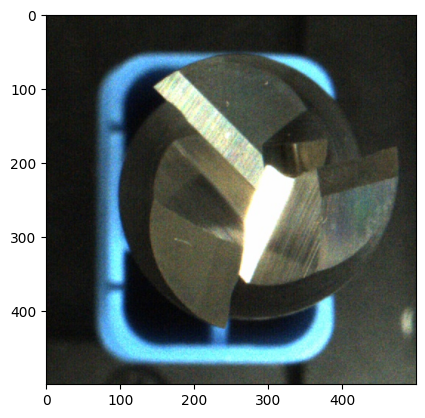

In [40]:
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import keras
import tensorflow as tf


# Path = './NG/NG_35.jpg'
Path = './DATA/test/PASS/PASS_90.jpg'
# Path = './DATA/test/NG/NG_90.jpg'
# Path = './DATA/PASS/PASS_99.jpg'
file_name_with_extension = os.path.basename(Path)
file_name, extension = os.path.splitext(file_name_with_extension)
# Vgg16 = keras.models.load_model('./knife_CNN_1.h5')

image = io.imread(Path)
if image.shape[-1] == 4:  # 如果通道数为4，通常是带有alpha通道的图像
  image = image[:, :, :3]  # 去除alpha通道
input_image = image[np.newaxis, ...]
predictions = model.predict(input_image)
predicted_score = np.squeeze(predictions[0])
predicted_class = np.argmax(predictions[0])
print(predicted_score)
if predicted_score > 0.5:
  print(f'圖片編號{file_name}的刀具良好')
else:
  print(f'圖片編號{file_name}的刀具損壞')
image_to_show = input_image[0]  # Extract the single image
image_to_show = image_to_show.reshape((500, 500, 3))  # Reshape to (height, width, channels)

plt.figure()
plt.imshow(image_to_show)
plt.show()
# NG 0.47059694
# PASS 0.19230111

In [38]:

from skimage import io, transform
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import keras
import tensorflow as tf

# 載入模型
# model = load_model('knife_resnet50_1.h5')  # 請替換成你的模型路徑

# 資料夾路徑
folder_path = './NG'  # 請替換成你的資料夾路徑
file_name_with_extension = os.path.basename(folder_path)
file_name, extension = os.path.splitext(file_name_with_extension)
file_name = file_name.split('_')
# 初始化變數
total_score = 0
total_images = 0
total_PASS = 0
total_NG = 0
count = 0
# 迭代資料夾中的所有圖片
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg'):
        image_path = os.path.join(folder_path, filename)

        # 讀取圖片
        image = io.imread(image_path)
        if image.shape[-1] == 4:
            image = image[:, :, :3]

        # 預處理圖片
        input_image = image[np.newaxis, ...]

        # 進行預測
        predictions = model.predict(input_image)
        predicted_score = np.squeeze(predictions[0])
        # print(predicted_score)
        # 累加預測分數
        total_score += predicted_score
        total_images += 1
        count += 1
        if predicted_score > 0.5:
          total_PASS += 1
          count_PASS = filename
        else:
          total_NG += 1


# 計算平均分數
average_score = total_score / total_images
print('使用模型: Resnet-50')
print(f'所有圖片的平均預測分數: {average_score}')
print(f'載入{file_name}的圖片{count}張')
print(f'辨識為PASS數量:{total_PASS}')
print(f'辨識為NG數量:{total_NG}')
print(f'第{count_PASS}張照片誤判')
# PASS 所有圖片的平均預測分數: 0.36081068962812424
# NG 0.33875621259212496
#辨識為NG數量:7
#辨識為PASS數量:3


1/1 [==============================] - 0s 36ms/step
使用模型: Resnet-50
所有圖片的平均預測分數: 0.010790751638815304
載入['NG']的圖片100張
辨識為PASS數量:1
辨識為NG數量:99
第NG_35.jpg張照片誤判


In [62]:
from skimage import io, transform
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import keras
import tensorflow as tf
from matplotlib import font_manager
from matplotlib.font_manager import FontProperties as font
# 這裡替換成你上傳的字體文件的路徑
font_path = 'TaipeiSansTCBetaRegular.ttf'
prop = font_manager.FontProperties(font_path)
font1 = font(fname="TaipeiSansTCBetaRegular.ttf")
# 載入模型
# model = load_model('knife_resnet50_1.h5')  # 請替換成你的模型路徑

# 資料夾路徑
folder_path = './NG'  # 請替換成你的資料夾路徑
file_name_with_extension = os.path.basename(folder_path)
file_name, extension = os.path.splitext(file_name_with_extension)
file_name = file_name.split('_')

# 初始化變數
total_score = 0
total_images = 0
total_PASS = 0
total_NG = 0
count = 0
count_PASS = ""

# 迭代資料夾中的所有圖片
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg'):
        image_path = os.path.join(folder_path, filename)

        # 讀取圖片
        image = io.imread(image_path)
        if image.shape[-1] == 4:
            image = image[:, :, :3]

        # 預處理圖片
        input_image = image[np.newaxis, ...]

        # 進行預測
        predictions = model.predict(input_image)
        predicted_score = np.squeeze(predictions[0])

        # 累加預測分數
        total_score += predicted_score
        total_images += 1
        count += 1
        if predicted_score > 0.5:
            total_PASS += 1
            count_PASS = filename
            result_text_1 ='刀具良好'
        else:
            total_NG += 1
            result_text_1 ='刀具損壞'
        # 寫結果到圖片上
        result_text = f'圖片編號{file_name},{result_text_1}'
        plt.imshow(image)
        plt.text(30, 30, result_text_1, bbox=dict(fill=False, edgecolor='red', linewidth=2), color='red', fontproperties=font1)
        plt.savefig(f'./RESULT/{filename.replace(".jpg", "_result.jpg")}')
        plt.clf()  # 清除當前圖形

# 計算平均分數
average_score = total_score / total_images
print('使用模型: Resnet-50')
print(f'所有圖片的平均預測分數: {average_score}')
print(f'載入{file_name}的圖片{count}張')
print(f'辨識為PASS數量:{total_PASS}')
print(f'辨識為NG數量:{total_NG}')
if count_PASS:
    print(f'第{count_PASS}張照片誤判')

print('結果已保存在./results資料夾中。')


1/1 [==============================] - 0s 40ms/step
使用模型: Resnet-50
所有圖片的平均預測分數: 0.010790751638815304
載入['NG']的圖片100張
辨識為PASS數量:1
辨識為NG數量:99
第NG_35.jpg張照片誤判
結果已保存在./results資料夾中。


<Figure size 640x480 with 0 Axes>

In [65]:
import shutil
shutil.make_archive('/content/RESULT', 'zip', '/content/RESULT')

'/content/RESULT.zip'